## **Importing Libraries**

In [362]:
from google.colab import files
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Loading Dataset

In [301]:
laptop_dataset=pd.read_csv("laptop_data.csv",index_col=0)
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# **Performing Explaratory Data Analysis**

In [302]:
laptop_dataset.shape

(1303, 11)

In [303]:
laptop_dataset.isnull().sum().sort_values(ascending=False)

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [304]:
laptop_dataset.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [305]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [306]:
for feature in laptop_dataset.columns:
  print("------------------------------------")
  print(laptop_dataset[feature].value_counts())

------------------------------------
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
------------------------------------
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
------------------------------------
Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
------------------------------------
ScreenResolution
Full HD 1920x1080                     

In [307]:
# fixing the Ram and Weight dataset by removing their units and converting to numerical values
laptop_dataset['Ram']=laptop_dataset['Ram'].str.replace('GB','').astype("int32")
laptop_dataset['Weight']=laptop_dataset['Weight'].str.replace('kg','').astype("float64")

In [308]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 117.1+ KB


<ipython-input-309-ee7cd6cd4ef0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_dataset['Price'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

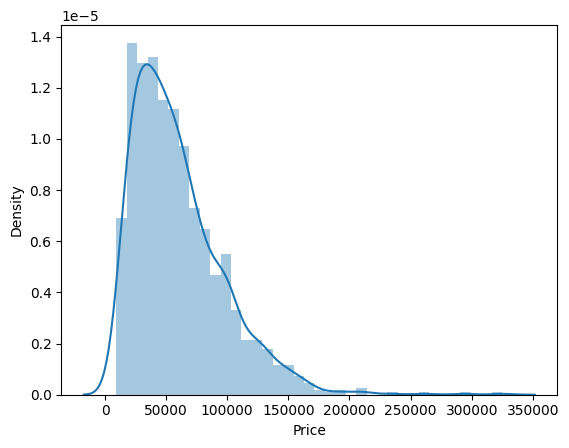

In [309]:
# checking the distribution of the laptop price
sns.distplot(laptop_dataset['Price'])
# our target variable is left-skewed as most of the laptops are low price and very few laptops have a very hugh price
plt.savefig("Skewed_target.png")
files.download("Skewed_target.png")

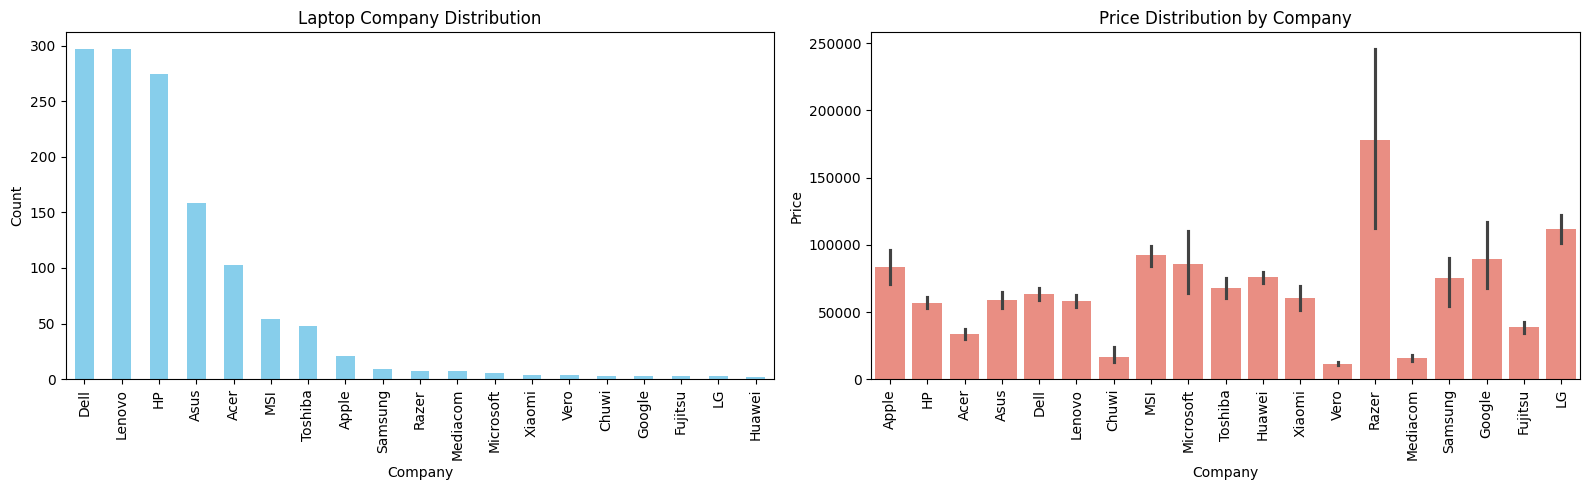

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [310]:
# data visualization for laptop companies, their count and relation with price
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plot Company vs their count
laptop_dataset['Company'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop Company Distribution')
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Count')

# plotting Company vs Price
sns.barplot(x=laptop_dataset['Company'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Company')
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()
fig.savefig('Laptop_Companies.png')
files.download("Laptop_Companies.png")

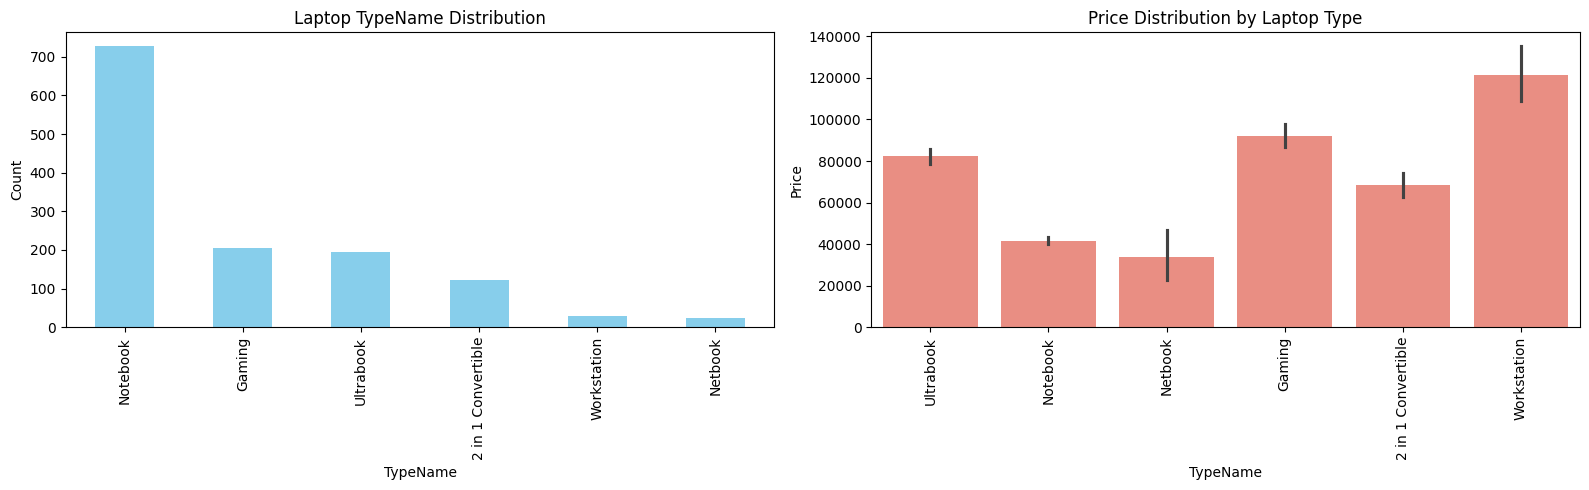

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [311]:
# data visualization for laptop types, their count and relation with price
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plot Laptop Type vs their count
laptop_dataset['TypeName'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop TypeName Distribution')
axs[0].set_xlabel('TypeName')
axs[0].set_ylabel('Count')

# plotting Laptop Type vs Price
sns.barplot(x=laptop_dataset['TypeName'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Laptop Type')
axs[1].set_xlabel('TypeName')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()
fig.savefig('Laptop_types.png')
files.download("Laptop_types.png")

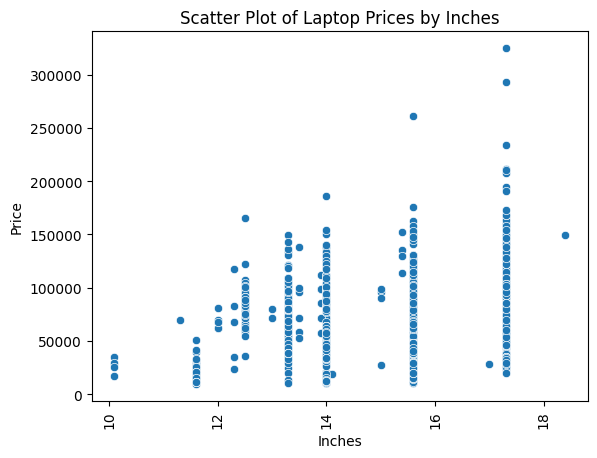

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [312]:
# Create scatter plot
sns.scatterplot(x=laptop_dataset['Inches'], y=laptop_dataset['Price'])
plt.xlabel('Inches')
plt.ylabel('Price')
plt.title('Scatter Plot of Laptop Prices by Inches')

plt.xticks(rotation="vertical")
plt.show()
plt.savefig("Laptop_screenSize_price_distribution.png")
files.download("Laptop_screenSize_price_distribution.png")

###### In conclusion, Company and Laptop Type are co-related with the price of the laptop whereas the scrren size is somehow co-related but not by a greater margin.

## **Feature Engineering on ScreenResolution**

In [313]:
laptop_dataset['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

##### The screen resolution contains a lot of information such as Touchscreen, Resolution value, whether it has an IPS Panel or not, etc.


In [314]:
# extracting touchsreen feature from ScreenResolution
laptop_dataset['Touchscreen']=laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# extracting IPS screen feature from ScreenResolution
laptop_dataset['IPS']=laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<ipython-input-315-b4e364feb3a5>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation


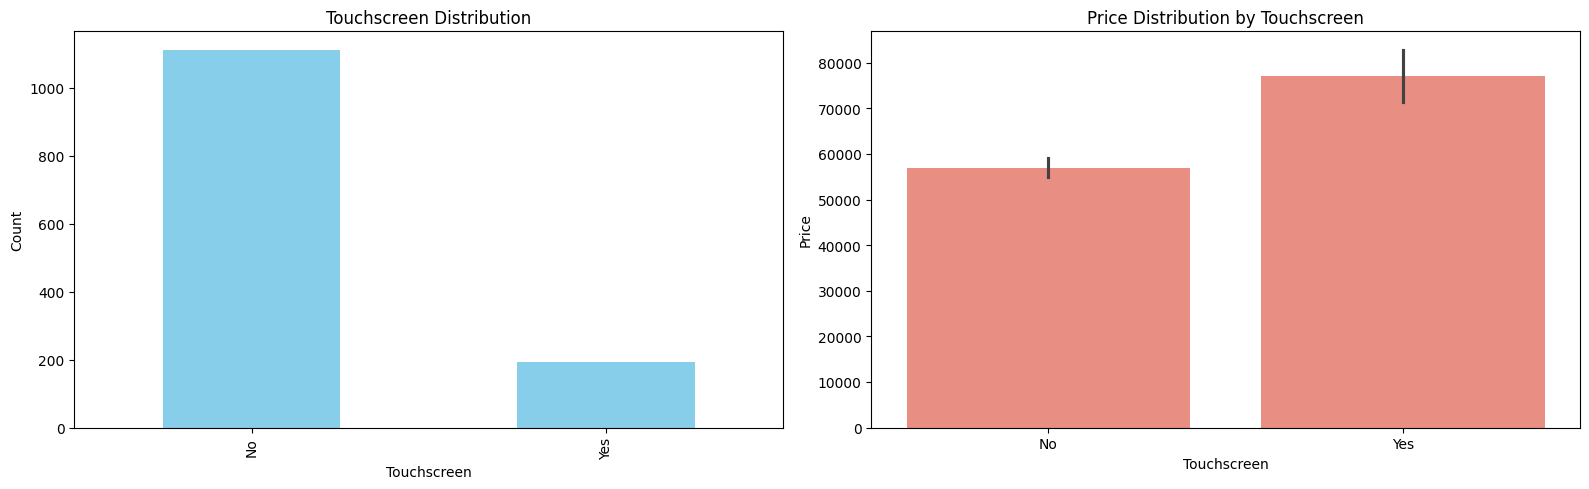

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [315]:
# data visualization for touchscreen and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plotting Touchscreen vs their count
laptop_dataset['Touchscreen'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Touchscreen Distribution')
axs[0].set_xlabel('Touchscreen')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

# Plotting Touchscreen vs Price
sns.barplot(x=laptop_dataset['Touchscreen'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Touchscreen')
axs[1].set_xlabel('Touchscreen')
axs[1].set_ylabel('Price')
axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

plt.tight_layout()
plt.show()
fig.savefig('Touchscreen_Laptops.png')
files.download('Touchscreen_Laptops.png')

<ipython-input-316-8a8874312231>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation


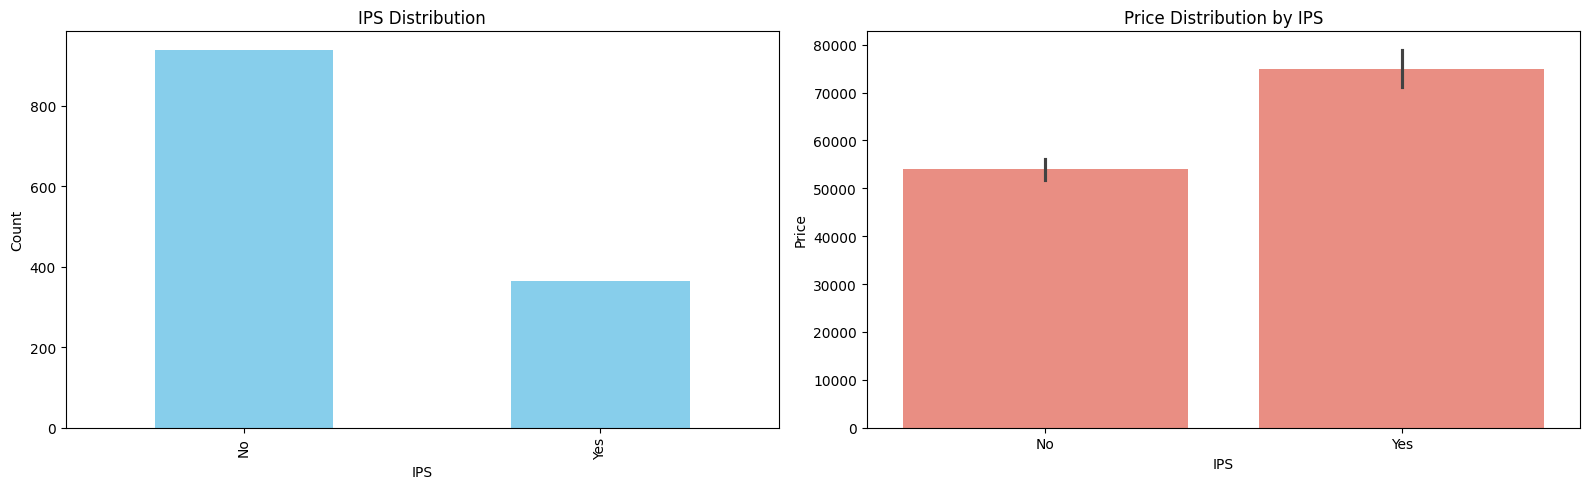

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [316]:
# data visualization for IPS and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plotting IPS vs their count
laptop_dataset['IPS'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('IPS Distribution')
axs[0].set_xlabel('IPS')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

# Plotting IPS vs Price
sns.barplot(x=laptop_dataset['IPS'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by IPS')
axs[1].set_xlabel('IPS')
axs[1].set_ylabel('Price')
axs[1].set_xticklabels(['No', 'Yes'])  # Setting labels for better interpretation

plt.tight_layout()
plt.show()
fig.savefig('IPS_Display_Laptops.png')
files.download('IPS_Display_Laptops.png')

In [317]:
# extracting X & Y resolution of the screen in pixels
temp=[]

# as the screen resolution pixels always appears at the end of the data in ScreenResolution column, we split it on the basis of space and obtain the last element of the array
for res in laptop_dataset['ScreenResolution'].str.split(' '):
  temp.append(res[-1])
tp=pd.DataFrame(temp)[0].str.split('x',expand=True)
laptop_dataset["X_res"]=tp[0].astype("int64")
laptop_dataset["Y_res"]=tp[1].astype("int64")

In [318]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


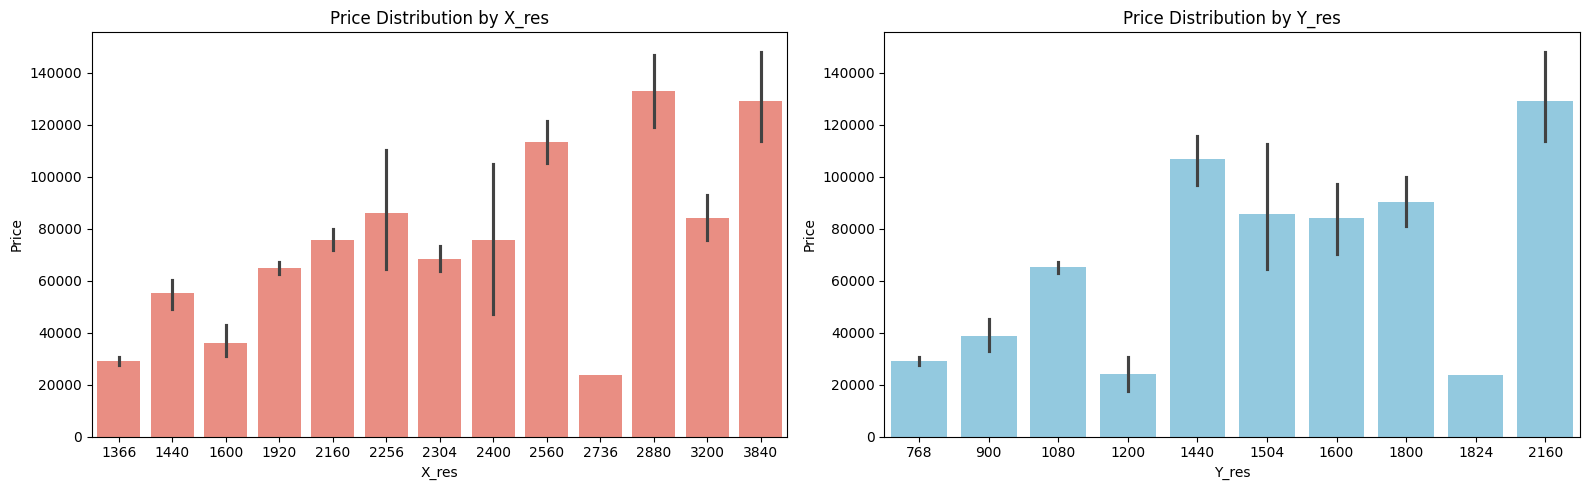

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [319]:
# data visualization for X_res and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plotting X_res vs Price
sns.barplot(x=laptop_dataset['X_res'], y=laptop_dataset['Price'], ax=axs[0], color='salmon')
axs[0].set_title('Price Distribution by X_res')
axs[0].set_xlabel('X_res')
axs[0].set_ylabel('Price')

# Plotting Y_res vs Price
sns.barplot(x=laptop_dataset['Y_res'], y=laptop_dataset['Price'], ax=axs[1], color='skyblue')
axs[1].set_title('Price Distribution by Y_res')
axs[1].set_xlabel('Y_res')
axs[1].set_ylabel('Price')

plt.tight_layout()
plt.show()
fig.savefig('Price_DIstribution_by_screenResolution.png')
files.download('Price_DIstribution_by_screenResolution.png')

##### It's clear that as the X and Y resolution increaases, the price of the laptop also increases, thus we compute a new feature called pixels per inches and add it to our dataset.

$$PPI = \frac{\sqrt{X_r^2 + Y_r^2}} {inches}$$


In [320]:
laptop_dataset['PPI']= ((laptop_dataset['X_res']**2) + (laptop_dataset['Y_res']**2))**0.5/laptop_dataset['Inches'].astype("float64")
# dropping columns which have been computed into a single column and are no longer needed in our dataset
laptop_dataset.drop(['ScreenResolution','X_res','Y_res','Inches'],axis=1,inplace=True)
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


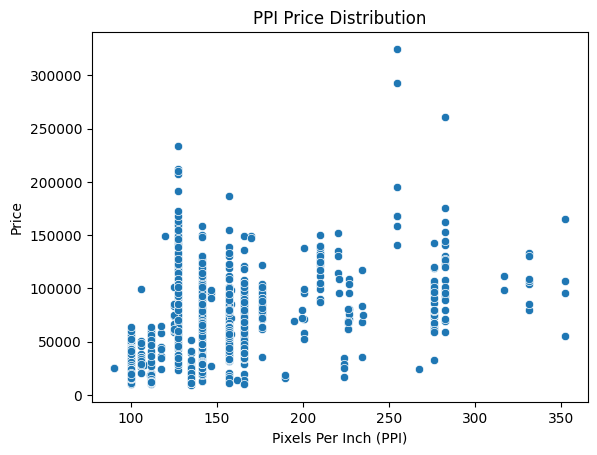

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [321]:
# data visualization for PPI and its relation with the price of the laptop
sns.scatterplot(x=laptop_dataset['PPI'], y=laptop_dataset['Price'])

plt.xlabel('Pixels Per Inch (PPI)')
plt.ylabel('Price')
plt.title('PPI Price Distribution')

plt.show()
plt.savefig('PPI_Price_Distribution.png')
files.download('PPI_Price_Distribution.png')

## **Feature Engineering on CPU**

In [322]:
laptop_dataset['Cpu'].value_counts(ascending=False)[:10]

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      37
Name: count, dtype: int64

In [323]:
# checking for intel and AMD processors
laptop_dataset['Cpu'].apply(lambda x: "Intel" if "Intel" in x else ("AMD" if "AMD" in x else x)).value_counts()

Cpu
Intel                            1240
AMD                                62
Samsung Cortex A72&A53 2.0GHz       1
Name: count, dtype: int64

##### By far, I3, I5 & I7 are the most used intel processors

In [324]:
processors=[]
for processor in laptop_dataset['Cpu'].str.split(" "):
  if(processor[0]=='Intel'):
    if(processor[2]=='i3'):
      processors.append("Intel i3")
    elif(processor[2]=='i5'):
      processors.append("Intel i5")
    elif(processor[2]=='i7'):
      processors.append("Intel i7")
    else:
      processors.append("Other Intel")
  else:
    processors.append("AMD")
laptop_dataset['Processor']=processors
laptop_dataset.drop(['Cpu'],axis=1,inplace=True)
laptop_dataset.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor
432,Lenovo,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.70,31914.720,0,1,157.350512,Intel i3
1038,Dell,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.09,56633.976,0,0,141.211998,Intel i5
1195,HP,Notebook,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.560,0,1,141.211998,Intel i7
185,Dell,Notebook,16,512GB SSD,Nvidia GeForce 150MX,Windows 10,2.77,82530.720,1,0,127.335675,Intel i7
177,MSI,Gaming,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.720,0,0,119.723216,Intel i7
1275,Asus,Ultrabook,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.120,0,1,165.632118,Other Intel
122,Lenovo,Notebook,8,256GB SSD,Nvidia GeForce 940MX,No OS,2.20,33513.120,0,0,141.211998,Intel i5
914,Acer,Notebook,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,26586.720,0,0,141.211998,Intel i3
535,Dell,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.320,0,0,141.211998,Intel i7
430,Samsung,Netbook,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,0,0,135.094211,Other Intel


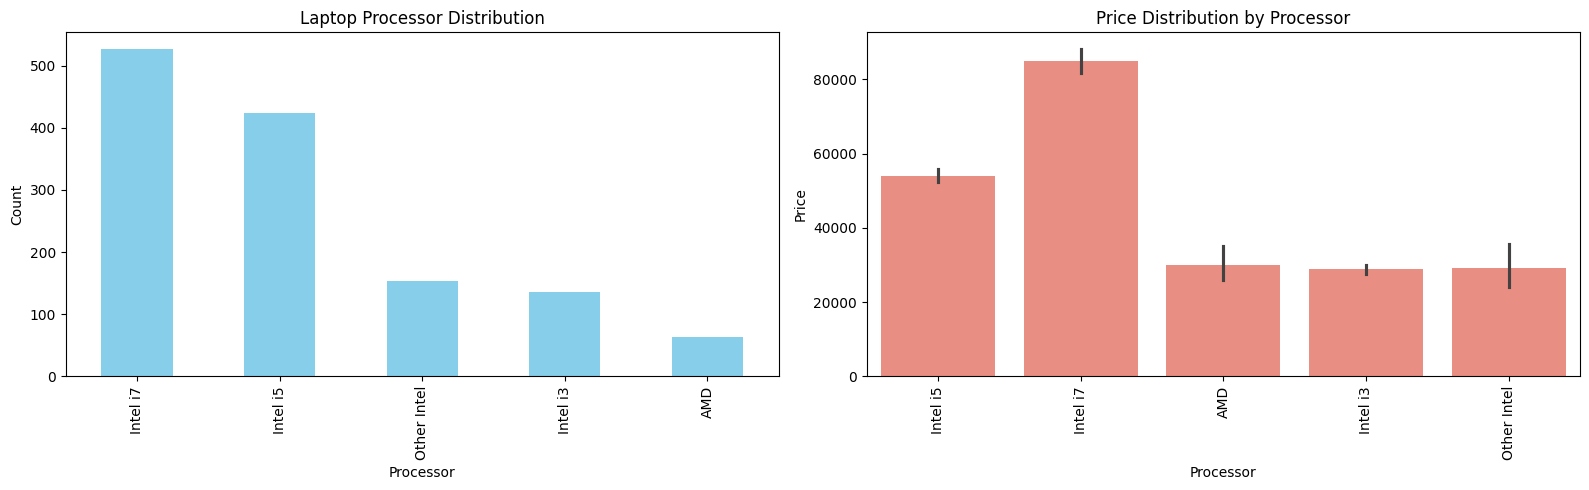

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [325]:
# data visualization for Processor, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting Processor vs their count
laptop_dataset['Processor'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop Processor Distribution')
axs[0].set_xlabel('Processor')
axs[0].set_ylabel('Count')

# plotting Processor vs Price
sns.barplot(x=laptop_dataset['Processor'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Processor')
axs[1].set_xlabel('Processor')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
fig.savefig('Laptop_Processors.png')
files.download('Laptop_Processors.png')

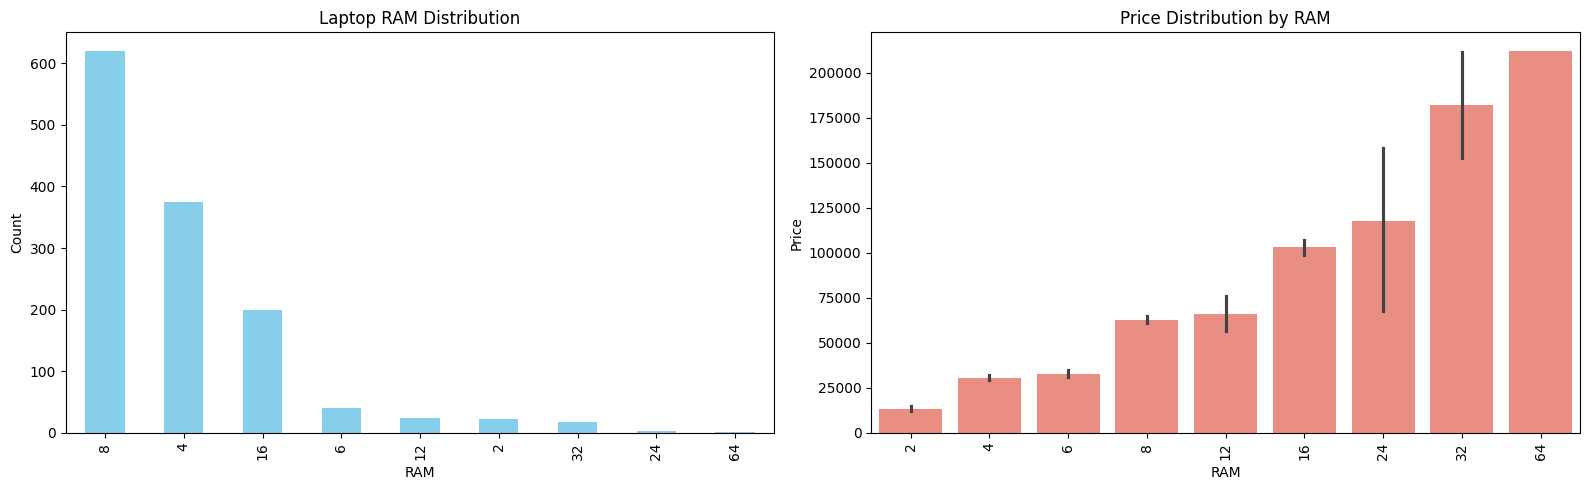

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [326]:
# data visualization for RAM, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting RAM vs their count
laptop_dataset['Ram'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop RAM Distribution')
axs[0].set_xlabel('RAM')
axs[0].set_ylabel('Count')

# plotting Ram vs Price
sns.barplot(x=laptop_dataset['Ram'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by RAM')
axs[1].set_xlabel('RAM')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
fig.savefig('Laptop_RAM_size.png')
files.download('Laptop_RAM_size.png')

## **Feature Engineering on Memory**

In [327]:
laptop_dataset['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [328]:
# removing units and decimal points from memory column
laptop_dataset['Memory'] = laptop_dataset['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('GB', '')
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('TB', '000')
laptop_dataset['Memory'].value_counts()

Memory
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD   

In [329]:
# there can be maximum 2 types of memory in a laptop
new=laptop_dataset["Memory"].str.split("+", n = 1, expand = True)
laptop_dataset["first"] = new[0].str.strip()
laptop_dataset["second"]= new[1].str.strip()

In [330]:
# creating a record of what type of memory is present in the laptop
laptop_dataset["Layer1HDD"] = laptop_dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer1SSD"] = laptop_dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer1Hybrid"] = laptop_dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer1Flash_Storage"] = laptop_dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# filling out missing columns
laptop_dataset['first'] = laptop_dataset['first'].str.replace(r'\D', '')
laptop_dataset["second"].fillna("0", inplace = True)
laptop_dataset['second'] = laptop_dataset['second'].str.replace(r'\D', '')

laptop_dataset["Layer2HDD"] = laptop_dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer2SSD"] = laptop_dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer2Hybrid"] = laptop_dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer2Flash_Storage"] = laptop_dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


# extrracting integer values
laptop_dataset["first"]=laptop_dataset["first"].str.split(' ',expand=True)[0].astype("int64")
laptop_dataset["second"]=laptop_dataset["second"].str.split(' ',expand=True)[0].astype("int64")

# assigning memory to their boolean values
laptop_dataset["HDD"]=(laptop_dataset["first"]*laptop_dataset["Layer1HDD"]+laptop_dataset["second"]*laptop_dataset["Layer2HDD"])
laptop_dataset["SSD"]=(laptop_dataset["first"]*laptop_dataset["Layer1SSD"]+laptop_dataset["second"]*laptop_dataset["Layer2SSD"])
laptop_dataset["Hybrid"]=(laptop_dataset["first"]*laptop_dataset["Layer1Hybrid"]+laptop_dataset["second"]*laptop_dataset["Layer2Hybrid"])
laptop_dataset["Flash_Storage"]=(laptop_dataset["first"]*laptop_dataset["Layer1Flash_Storage"]+laptop_dataset["second"]*laptop_dataset["Layer2Flash_Storage"])

# dropping unnecessary columns
laptop_dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [331]:
laptop_dataset.drop(['Memory'],axis=1,inplace=True)
laptop_dataset.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
409,Lenovo,Notebook,2,Intel HD Graphics 500,Windows 10,1.150,16221.0960,0,0,135.094211,Other Intel,0,0,0,32
738,MSI,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,1.800,111593.8944,0,0,141.211998,Intel i7,1000,256,0,0
179,HP,2 in 1 Convertible,8,Intel UHD Graphics 620,Windows 10,1.290,79866.7200,1,1,331.264236,Intel i5,0,256,0,0
104,Microsoft,Ultrabook,8,Intel HD Graphics 620,Windows 10 S,1.252,71395.2000,1,0,200.842560,Intel i5,0,256,0,0
764,Dell,Notebook,4,Intel HD Graphics 520,Windows 10,1.650,45234.7200,0,0,117.826530,Intel i3,500,0,0,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.040,114017.6016,0,1,220.534624,Intel i7,0,0,0,256
100,HP,Notebook,8,AMD Radeon 530,Windows 10,1.910,38308.3200,0,0,141.211998,Intel i7,0,256,0,0
414,Asus,2 in 1 Convertible,8,Intel HD Graphics 620,Windows 10,1.270,49443.8400,1,1,165.632118,Intel i5,0,256,0,0
265,Dell,2 in 1 Convertible,8,Intel UHD Graphics 620,Windows 10,2.670,42570.7200,1,0,141.211998,Intel i5,0,256,0,0
24,HP,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.910,35111.5200,0,0,141.211998,Intel i7,0,256,0,0


## **Feature Engineering on GPU**

In [332]:
laptop_dataset['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [333]:
# extracting GPU brands
laptop_dataset['Gpu']=laptop_dataset['Gpu'].str.split(' ',expand=True)[0]
laptop_dataset.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
501,HP,Notebook,8,AMD,Windows 10,1.91,32979.7872,0,0,100.454670,Intel i5,0,256,0,0
397,Lenovo,Notebook,8,Intel,Windows 10,1.90,49976.6400,0,1,157.350512,Intel i5,0,256,0,0
1149,Lenovo,2 in 1 Convertible,8,Intel,Windows 10,1.27,124621.9200,1,1,209.800683,Intel i7,0,256,0,0
409,Lenovo,Notebook,2,Intel,Windows 10,1.15,16221.0960,0,0,135.094211,Other Intel,0,0,0,32
1019,HP,Notebook,8,Intel,Windows 10,1.43,118761.1200,0,0,157.350512,Intel i7,0,256,0,0


In [334]:
laptop_dataset['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [335]:
# we remove ARm as it is an outlier
laptop_dataset=laptop_dataset[laptop_dataset['Gpu']!="ARM"]

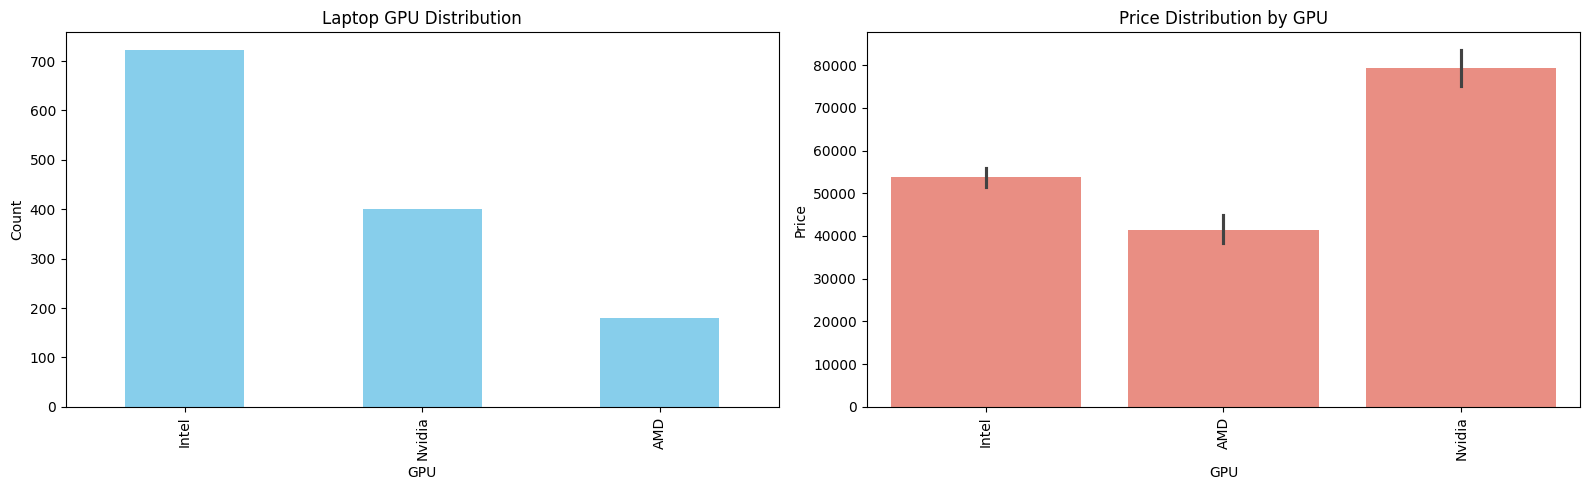

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [336]:
# data visualization for GPU, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting GPU vs their count
laptop_dataset['Gpu'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop GPU Distribution')
axs[0].set_xlabel('GPU')
axs[0].set_ylabel('Count')

# plotting GPU vs Price
sns.barplot(x=laptop_dataset['Gpu'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by GPU')
axs[1].set_xlabel('GPU')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
fig.savefig('Laptop_GPU.png')
files.download('Laptop_GPU.png')

## **Feature Engineering on Operating System**

In [337]:
laptop_dataset['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [338]:
# we can reduce the number of categories
laptop_dataset['OpSys']=laptop_dataset['OpSys'].apply(lambda x: 'Windows' if 'Windows' in x else("macOS" if "macOS" in x else("macOS" if "Mac" in x else "others")))
laptop_dataset['OpSys'].value_counts()

OpSys
Windows    1125
others      156
macOS        21
Name: count, dtype: int64

In [339]:
laptop_dataset.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage
263,Dell,Notebook,4,Intel,Windows,2.18,35004.9600,0,0,141.211998,Intel i5,1000,0,0,0
865,HP,Notebook,4,Intel,Windows,2.07,48484.8000,0,0,141.211998,Intel i5,500,0,0,0
23,Dell,2 in 1 Convertible,8,Intel,Windows,1.62,43636.3200,1,0,165.632118,Intel i5,0,256,0,0
702,Lenovo,Notebook,8,AMD,Windows,2.20,22857.1200,0,0,100.454670,AMD,1000,0,0,0
230,Asus,Notebook,4,Intel,Windows,2.37,21258.1872,0,0,100.454670,Intel i3,1000,0,0,0
147,Asus,Notebook,4,Intel,Windows,2.00,18328.3200,0,0,141.211998,Other Intel,1000,0,0,0
474,Asus,Notebook,12,Intel,Windows,2.06,69210.7200,0,1,282.423996,Intel i7,1000,128,0,0
418,Dell,Notebook,8,Intel,Windows,2.14,28768.5360,0,0,100.454670,Intel i5,1000,0,0,0
451,Dell,Workstation,16,Nvidia,Windows,2.17,105228.0000,0,1,141.211998,Intel i7,0,256,0,0
1169,MSI,Gaming,8,Nvidia,Windows,2.20,44701.9200,0,1,141.211998,Intel i7,1000,0,0,0


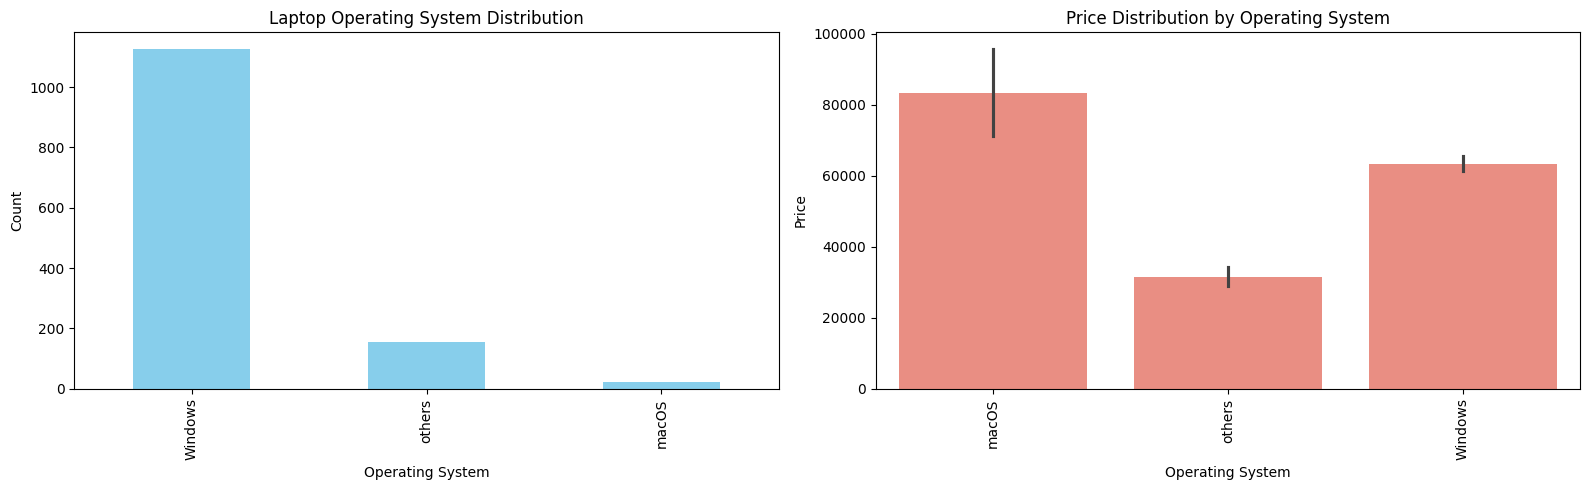

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [340]:
# data visualization for Operating System, their count and its relation with the price of the laptop
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# plotting Operating System vs their count
laptop_dataset['OpSys'].value_counts().plot(kind="bar", ax=axs[0], color='skyblue')
axs[0].set_title('Laptop Operating System Distribution')
axs[0].set_xlabel('Operating System')
axs[0].set_ylabel('Count')

# plotting Operating System vs Price
sns.barplot(x=laptop_dataset['OpSys'], y=laptop_dataset['Price'], ax=axs[1], color='salmon')
axs[1].set_title('Price Distribution by Operating System')
axs[1].set_xlabel('Operating System')
axs[1].set_ylabel('Price')
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
fig.savefig('Laptop_Operating_Systems.png')
files.download('Laptop_Operating_Systems.png')

<ipython-input-341-41292fd8d5a4>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_dataset['Weight'], ax=axs[0])


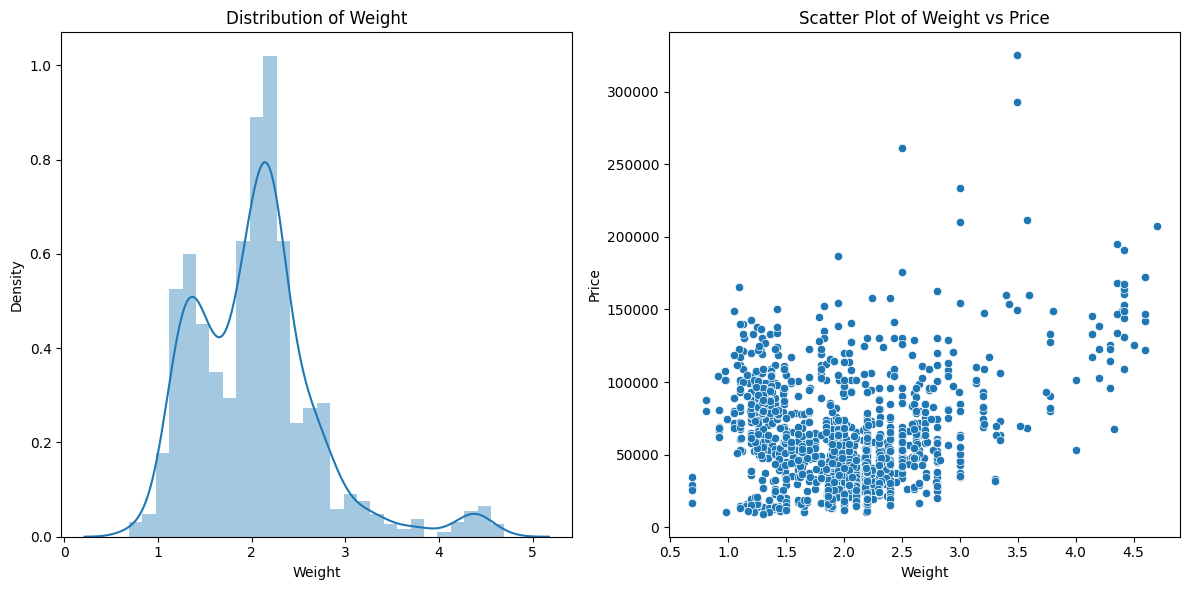

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [341]:
# perforing data visualization on Weight column of the laptop dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Distribution plot of Laptop Weights
sns.distplot(laptop_dataset['Weight'], ax=axs[0])
axs[0].set_title('Distribution of Weight')
axs[0].set_xlabel('Weight')
axs[0].set_ylabel('Density')

# Scatter plot of Laptop Weights vs Laptop Price
sns.scatterplot(x='Weight', y='Price', data=laptop_dataset, ax=axs[1])
axs[1].set_title('Scatter Plot of Weight vs Price')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Price')

plt.tight_layout()
plt.show()
fig.savefig('Laptop_Weights.png')
files.download('Laptop_Weights.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

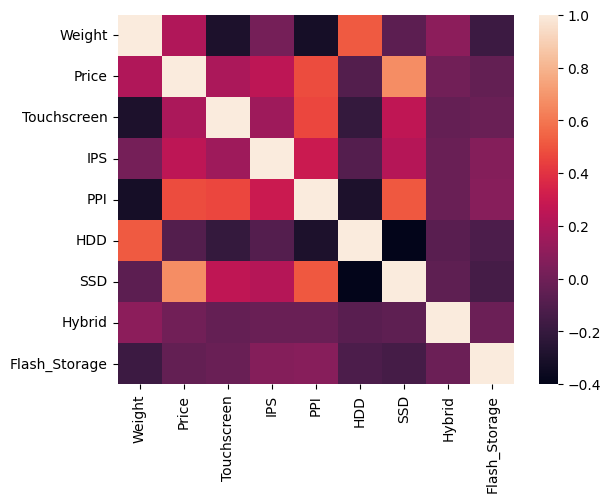

In [342]:
# creating a heatmap of the correlations
num = laptop_dataset.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num.corr())
plt.savefig("Correlation_Heatmap.png")
files.download("Correlation_Heatmap.png")

In [343]:
num.corr()

,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage
Weight,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818,0.095122,-0.179165
Price,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660,0.007942,-0.040067
Touchscreen,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577,-0.039591,-0.020809
IPS,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311,-0.022505,0.068616
PPI,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437,-0.020095,0.076479
HDD,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750,-0.076674,-0.117165
SSD,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000,-0.059845,-0.147407
Hybrid,0.095122,0.007942,-0.039591,-0.022505,-0.020095,-0.076674,-0.059845,1.000000,-0.014307
Flash_Storage,-0.179165,-0.040067,-0.020809,0.068616,0.076479,-0.117165,-0.147407,-0.014307,1.000000


In [344]:
# hybrid and flash storage have a very low correlation with Price and thus we can drop them from our datset
laptop_dataset.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

<ipython-input-345-cf7b390807ab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_dataset['Price'], ax=axs[0])
<ipython-input-345-cf7b390807ab>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop_dataset['Price']), ax=axs[1])


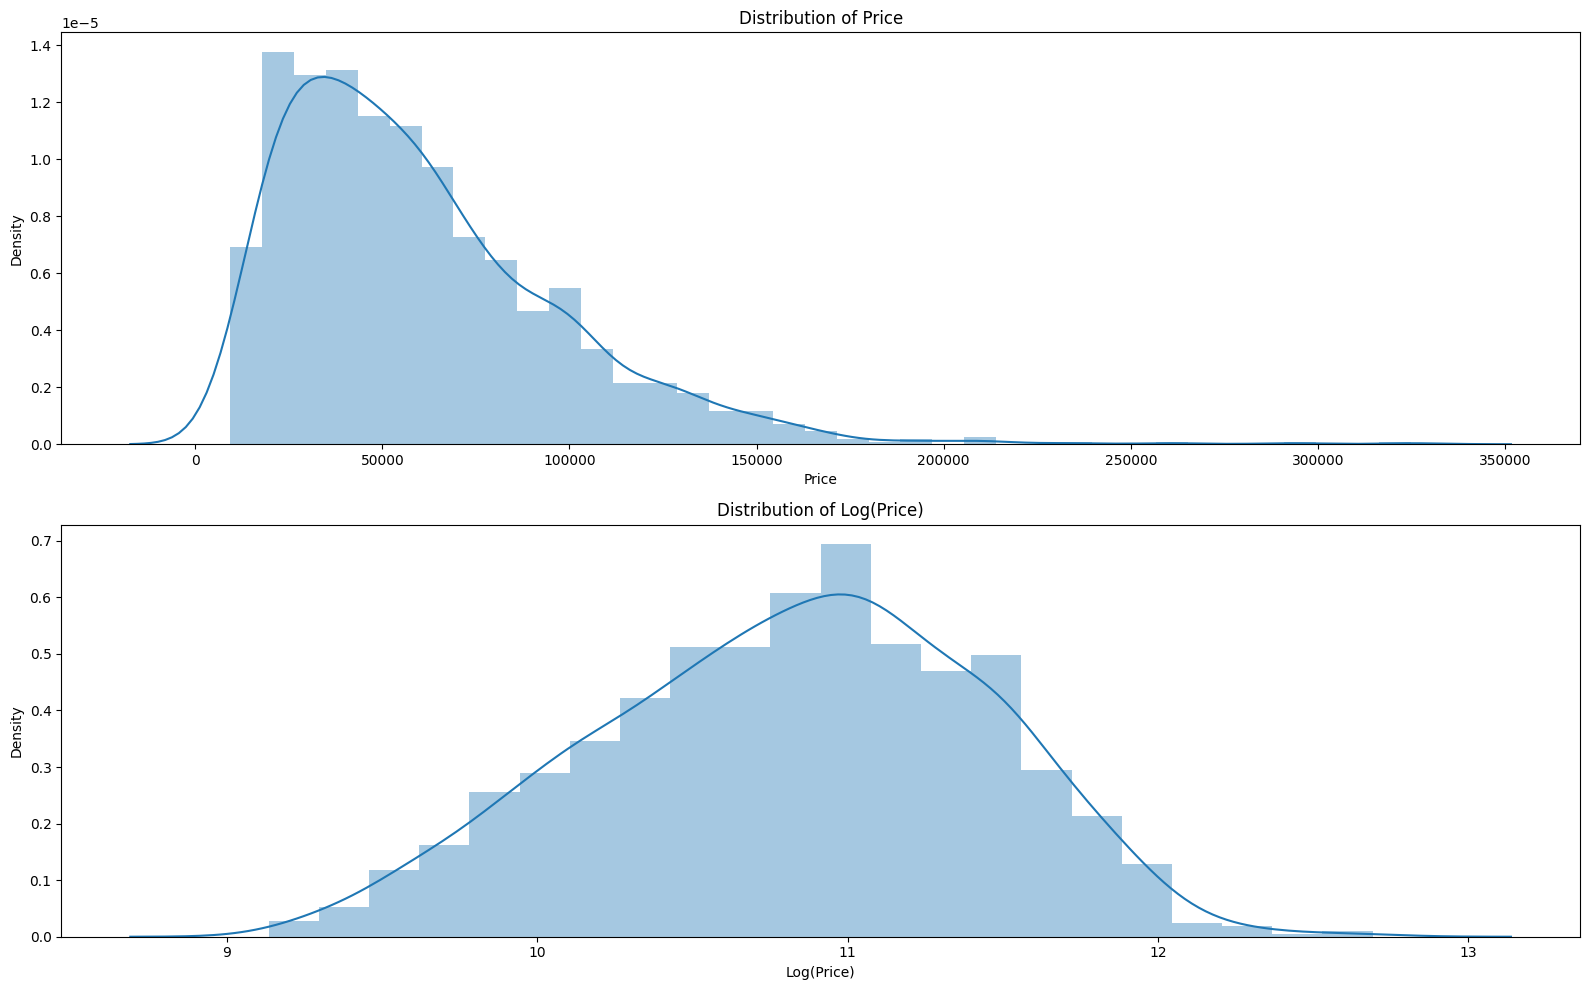

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [345]:
fig, axs = plt.subplots(2, 1, figsize=(16, 10))

# Distribution plot for 'Price'
sns.distplot(laptop_dataset['Price'], ax=axs[0])
axs[0].set_title('Distribution of Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Density')

# Distribution plot for logarithm of 'Price'
sns.distplot(np.log(laptop_dataset['Price']), ax=axs[1])
axs[1].set_title('Distribution of Log(Price)')
axs[1].set_xlabel('Log(Price)')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()
fig.savefig("Price_log_distribution.png")
files.download("Price_log_distribution.png")

Using logarithm function on the output target value 'Price' helps to remove the right-skewness from the dataset and makes it ideal for our learning algorithms to learn from

## **Creating our datasets**

In [346]:
X=laptop_dataset.drop(['Price'],axis=1)
y=np.log(laptop_dataset['Price'])
X.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,PPI,Processor,HDD,SSD
333,Lenovo,Notebook,4,Intel,Windows,1.85,0,0,141.211998,Intel i3,1000,0


## **Splitting Test and Train datasets**

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=22)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1041, 12) (1041,)
(261, 12) (261,)


## **Handling Categorical Features**

In [348]:
X_train.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,PPI,Processor,HDD,SSD
500,Asus,Netbook,4,Intel,Windows,1.2,0,0,135.094211,Other Intel,0,0


In [349]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Performing one hot encoding on the categorical features
encoder = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 4, 9])
], remainder="passthrough")

encoder.fit(X)
X_train_encoded=encoder.transform(X_train)
X_test_encoded=encoder.transform(X_test)

# **Linear Regression**

In [363]:
from sklearn.linear_model import LinearRegression

linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train_encoded,y_train)
y_predicted=linear_regression_model.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(linear_regression_model.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('Linear_Regression_model.pkl', 'wb') as file:
    pickle.dump(linear_regression_model, file)
files.download("Linear_Regression_model.pkl")

Mean Absolute Error (MAE): 0.21039621214199625
Mean Squared Error (MSE): 0.06905171901663047
R2 Training score: 0.7949076572174677
R2 Testing score: 0.8304095218877641


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **SVM Regressor**

In [365]:
from sklearn.svm import SVR

SVR_regressor=SVR(kernel='rbf',C=10000,epsilon=0.1)
SVR_regressor.fit(X_train_encoded,y_train)
y_predicted=SVR_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(SVR_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('SVM_Regressor_model.pkl', 'wb') as file:
    pickle.dump(SVR_regressor, file)
files.download("SVM_Regressor_model.pkl")

Mean Absolute Error (MAE): 0.20729298482338832
Mean Squared Error (MSE): 0.10707279515491684
R2 Training score: 0.8398698557995636
R2 Testing score: 0.7370300583137905


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Decision Tree Regressor**

In [368]:
from sklearn.tree import DecisionTreeRegressor

Decision_tree_regressor=DecisionTreeRegressor(max_depth=8)
Decision_tree_regressor.fit(X_train_encoded,y_train)
y_predicted=Decision_tree_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(Decision_tree_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('Decision_tree_regressor_model.pkl', 'wb') as file:
    pickle.dump(Decision_tree_regressor, file)
files.download("Decision_tree_regressor_model.pkl")

Mean Absolute Error (MAE): 0.19755240083425513
Mean Squared Error (MSE): 0.0658990445677603
R2 Training score: 0.8940123364332083
R2 Testing score: 0.8381524655064068


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Random Forest Regression**

In [369]:
from sklearn.ensemble import RandomForestRegressor

Random_forest_regressor=RandomForestRegressor(n_estimators=100,random_state=2,max_samples=0.5,max_features=0.75,max_depth=15)
Random_forest_regressor.fit(X_train_encoded,y_train)
y_predicted=Random_forest_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(Random_forest_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('Random_forest_regressor_model.pkl', 'wb') as file:
    pickle.dump(Random_forest_regressor, file)
files.download("Random_forest_regressor_model.pkl")

Mean Absolute Error (MAE): 0.16548542230348626
Mean Squared Error (MSE): 0.04795816747074708
R2 Training score: 0.9432518863792929
R2 Testing score: 0.8822151183695824


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **XGBoost Regressor**

In [370]:
from xgboost import XGBRegressor

XGB_regressor=XGBRegressor(n_estimators=30,max_depth=4,learning_rate=0.3)
XGB_regressor.fit(X_train_encoded,y_train)
y_predicted=XGB_regressor.predict(X_test_encoded)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(XGB_regressor.predict(X_train_encoded), y_train)
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('XGBoost_regressor_model.pkl', 'wb') as file:
    pickle.dump(XGB_regressor, file)
files.download("XGBoost_regressor_model.pkl")

Mean Absolute Error (MAE): 0.17102617851984125
Mean Squared Error (MSE): 0.04670545450683051
R2 Training score: 0.9122397884504729
R2 Testing score: 0.8852917715436597


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Standarizing the data before passing through Neural Networks**

In [371]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_encoded)
X_test_scaled=scaler.transform(X_test_encoded)

# **Artificial Neural Network (ANN)**

In [372]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

ANN_model=Sequential()
ANN_model.add(Dense(44,activation="relu",input_dim=X_train_scaled.shape[1]))
ANN_model.add(Dense(48,activation="relu"))
ANN_model.add(Dense(60,activation="relu"))
ANN_model.add(Dense(52,activation="relu"))
ANN_model.add(Dense(44,activation="relu"))
ANN_model.add(Dense(8,activation="relu"))
ANN_model.add(Dense(36,activation="relu"))
ANN_model.add(Dense(40,activation="relu"))
ANN_model.add(Dense(1,activation="linear"))

ANN_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mean_absolute_error", metrics=["mae"])
result=ANN_model.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=16, epochs=200, verbose=0)

y_predicted=ANN_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(y_train,ANN_model.predict(X_train_scaled))
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('ANN_model.pkl', 'wb') as file:
    pickle.dump(ANN_model, file)
files.download("ANN_model.pkl")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error (MAE): 0.19527859127734548
Mean Squared Error (MSE): 0.06185027553610658
R2 Training score: 0.9104041504222666
R2 Testing score: 0.8480962103634869


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

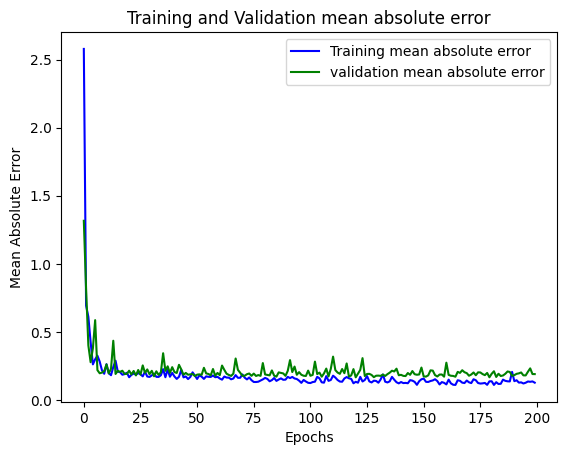

<Figure size 640x480 with 0 Axes>

In [379]:
loss_train = result.history['mae']
loss_val = result.history['val_mae']
epochs = range(0,200)
len(loss_train)
plt.plot(epochs, loss_train, 'b', label='Training mean absolute error')
plt.plot(epochs, loss_val, 'g', label='validation mean absolute error')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
plt.savefig("ANN_model_MAE.png")
# files.download("ANN_model_MAE.png")

# **Recuurent Neural Network (RNN)**

In [376]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

RNN_model=Sequential()
RNN_model.add(Dense(44,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(48,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(60,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(52,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(44,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(8,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(36,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(40,activation="relu",input_dim=X_train_scaled.shape[1]))
RNN_model.add(Dense(1,activation="linear"))

RNN_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mean_absolute_error", metrics=["mae"])
RNN_result=RNN_model.fit(X_train_scaled, y_train, validation_split=0.25, batch_size=64, epochs=200, verbose=0)

y_predicted=RNN_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2_train = r2_score(y_train,RNN_model.predict(X_train_scaled))
r2_test = r2_score(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Training score:", r2_train)
print("R2 Testing score:", r2_test)

with open('RNN_model.pkl', 'wb') as file:
    pickle.dump(RNN_model, file)
files.download("RNN_model.pkl")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error (MAE): 0.17796419696429638
Mean Squared Error (MSE): 0.0562819561388011
R2 Training score: 0.9321563179387262
R2 Testing score: 0.8617719589519217


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

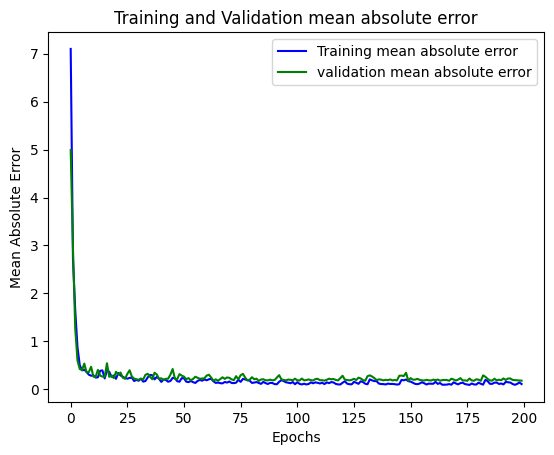

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [380]:
loss_train = RNN_result.history['mae']
loss_val = RNN_result.history['val_mae']
epochs = range(0,200)
len(loss_train)
plt.plot(epochs, loss_train, 'b', label='Training mean absolute error')
plt.plot(epochs, loss_val, 'g', label='validation mean absolute error')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
plt.savefig("RNN_model_MAE.png")
files.download("RNN_model_MAE.png")